Q2. a. Design a single unit perceptron for classification og linearly separable binary dataset without using pre-defined models. Use the perceptron from sklearn.
b. Identify the problems in single unit perceptron using AND, OR, XOR data and analyze the results.

In [15]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

Accuracy : 100.00%


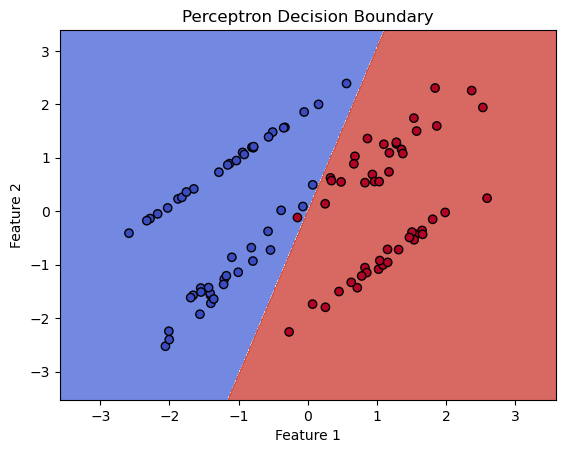

In [23]:
x,y =make_classification(n_samples=100, n_features =2, n_classes =2, n_informative =2, n_redundant =0, random_state =42)
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.2, random_state =42)

model = Perceptron(max_iter =1000, tol =1e-3)
model.fit(x_train, y_train)

print(f"Accuracy :{model.score(x_test, y_test)*100: .2f}%")

xx,yy = np.meshgrid(np.arange(x[:, 0].min() -1,x[:, 0].max()+1,0.01),
                    np.arange(x[:, 1].min() -1, x[:, 1].max() +1, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]). reshape(xx.shape)

plt.contourf(xx, yy, Z , alpha =0.8, cmap ='coolwarm')
plt.scatter(x[:,0], x[:,1], c=y,edgecolor='k',cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Perceptron Decision Boundary")
plt.show()


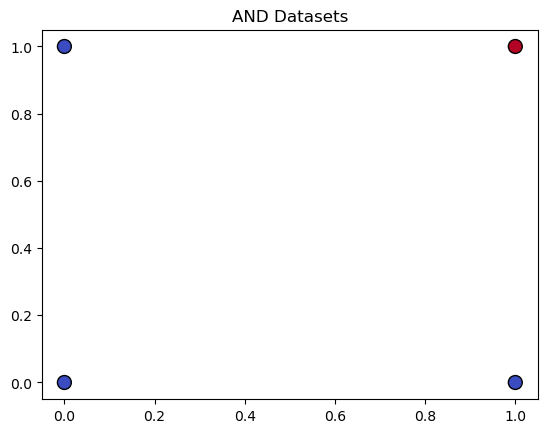

AND accuracy :100.00%


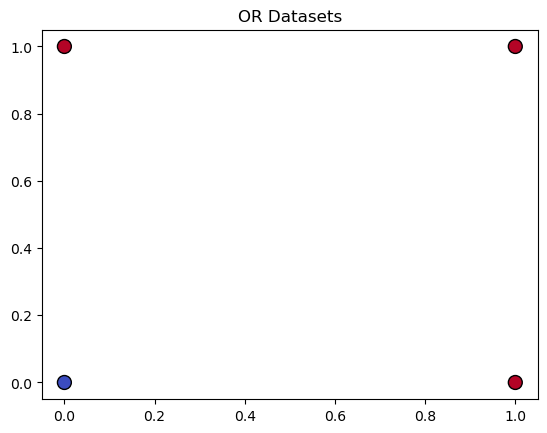

OR accuracy :100.00%


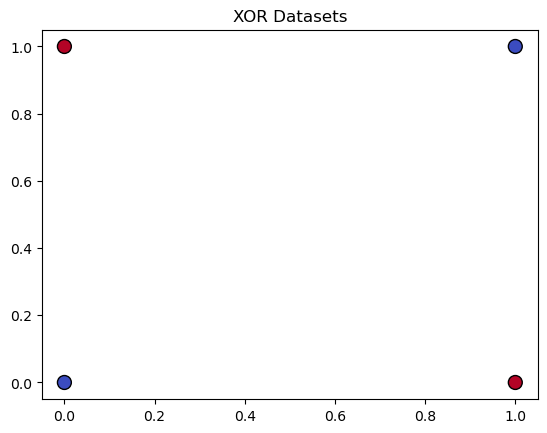

XOR accuracy :50.00%


In [25]:
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

datasets ={
    'AND':([[0,0],[0,1],[1,0],[1,1]],[0,0,0,1]),
    'OR': ([[0,0],[0,1],[1,0],[1,1]],[0,1,1,1]),
    'XOR':([[0,0],[0,1],[1,0],[1,1]],[0,1,1,0])
}

for name,(X,y) in datasets.items():
    perceptron =Perceptron(max_iter =1000, eta0=1, random_state =0).fit(X,y)
    predictions =perceptron.predict(X)
    plt.scatter(*np.array(X).T, c=y, cmap ='coolwarm', edgecolor ='k', s=100)
    plt.title(f"{name} Datasets")
    plt.show()
    print(f"{name} accuracy :{np.mean(predictions ==y)*100 :.2f}%")